# Foundations for statistical inference - Confidence intervals

## Sampling from Ames, Iowa

If you have access to data on an entire population, say the size of every house in Ames, Iowa, it’s straight forward to answer questions like, “How big is the typical house in Ames?” and “How much variation is there in sizes of houses?”. If you have access to only a sample of the population, as is often the case, the task becomes more complicated. What is your best guess for the typical size if you only know the sizes of several dozen houses? This sort of situation requires that you use your sample to make inference on what your population looks like.

## The data

In the previous lab, "Sampling Distributions", we looked at the population data of houses from Ames, Iowa. Let’s start by loading that data set.

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from pathlib import Path

sns.set_theme()

np.random.seed(0)


Let us now load the data.

In [2]:
ames_path = Path("ames.csv")
ames_df = pd.read_csv(ames_path)


In this lab we’ll start with a simple random sample of size 60 from the population. Specifically, this is a simple random sample of size 60. Note that the data set has information on many housing variables, but for the first portion of the lab we’ll focus on the size of the house, represented by the variable `Gr.Liv.Area`.

In [3]:
population = ames_df["Gr.Liv.Area"]
samp = population.sample(60)


### Exercise 1 - Describe the distribution of your sample. What would you say is the “typical” size within your sample? Also state precisely what you interpreted “typical” to mean.

From this sample, the typical size would be around 1500/1750, where I am specifically referring to the mean.

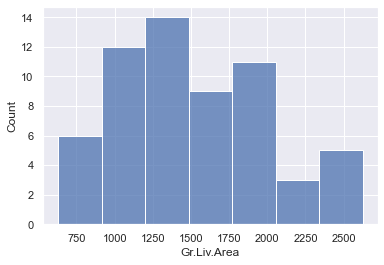

In [5]:
sns.histplot(samp)

plt.show()

### Exercise 2 - Would you expect another student’s distribution to be identical to yours? Would you expect it to be similar? Why or why not?

Definitely not, since we are taking just a sample of the whole population. In addition, this sample is pretty small, so the standard error will be big.

## Confidence intervals

One of the most common ways to describe the typical or central value of a distribution is to use the mean. In this case we can calculate the mean of the sample using the `mean()` method.

In [6]:
sample_mean = samp.mean()

Return for a moment to the question that first motivated this lab: based on this sample, what can we infer about the population? Based only on this single sample, the best estimate of the average living area of houses sold in Ames would be the sample mean, usually denoted as $\hat{x}$, but called here `sample_mean`. That serves as a good _point estimate_ but it would be useful to also communicate how uncertain we are of that estimate. This can be captured by using a _confidence interval_.

We can calculate a 95% confidence interval for a sample mean by adding and subtracting 1.96 standard errors to the point estimate (See Section 4.2.3 if you are unfamiliar with this formula).

In [10]:
se = samp.std() / (60 ** 0.5)
lower = sample_mean - 1.96 * se 
upper = sample_mean + 1.96 * se 

ci = [lower, upper]

ci

[1401.9329700306305, 1659.3670299693697]

## Exercise 3 - For the confidence interval to be valid, the sample mean must be normally distributed and have standard error $\frac{s}{\sqrt{n}}$. What conditions must be met for this to be true?

The success-failure condition must be met, i.e. $np \ge 10$ and $n(1 - p) \ge 10$. Also, a sample must be made of random observations.

## Confidence levels

### Exercise 4 - What does “95% confidence” mean? If you’re not sure, see Section 4.2.2.

It means that we are 95% confident that the true population parameter will fall under our confidence interval. 

In this case we have the luxury of knowing the true population mean since we have data on the entire population. This value can be calculated as following.

In [9]:
population.mean()

1499.6904436860068

### Exercise 5 - Does your confidence interval capture the true average size of houses in Ames? If you are working on this lab in a classroom, does your neighbor’s interval capture this value?

My interval captured the true population mean. Regarding my neighbor, there's a 95% that his interval captures this value.

### Exercise 6 - Each student in your class should have gotten a slightly different confidence interval. What proportion of those intervals would you expect to capture the true population mean? Why? If you are working in this lab in a classroom, collect data on the intervals created by other students in the class and calculate the proportion of intervals that capture the true population mean.

I would expect indeed 95% of those interval to capture the true population mean, since this is the level of confidence we chose.

We’re going to recreate many samples to learn more about how sample means and confidence intervals vary from one sample to another.

Here is the rough outline:

1. Obtain a random sample.
2. Calculate and store the sample’s mean and standard deviation.
3. Repeat steps (1) and (2) 50 times.
4. Use these stored statistics to calculate many confidence intervals.

But before we do all of this, we need to first create empty vectors where we can save the means and standard deviations that will be calculated from each sample. And while we’re at it, let’s also store the desired sample size as `n`.



In [13]:
samp_mean = []
samp_std = []

samples = 50
n = 60

Now we’re ready for the loop where we calculate the means and standard deviations of 50 random samples.

In [14]:
for _ in range(samples):
    samp = population.sample(n)
    samp_mean.append(samp.mean())
    samp_std.append(samp.std())

samp_mean = np.array(samp_mean)
samp_std = np.array(samp_std)

Lastly, we construct the confidence intervals.

In [26]:
lower_vector = samp_mean - 1.96 * (samp_std / (n ** 0.5))
upper_vector = samp_mean + 1.96 * (samp_std / (n ** 0.5))

ci_vector = np.hstack([lower_vector.reshape(samples, 1), upper_vector.reshape(samples, 1)])


array([1336.34671708, 1561.48661625])

Lower bounds of these 50 confidence intervals are stored in lower_vector, and the upper bounds are in upper_vector. Let’s view the first interval.

In [27]:
ci_vector[0]

array([1336.34671708, 1561.48661625])

## On your own

### 1. Plot all intervals. What proportion of your confidence intervals include the true population mean? Is this proportion exactly equal to the confidence level? If not, explain why.

In the graph below, each horizontal line is the confidence interval for each of our samples, while the vertical blue line is the population mean, and we can see that only one interval ($\frac{1}{60} \approx 0.2$) does not include the true population mean, but this should give you no surprise since the confidence interval is not exact especially if we are taking just 60 samples.

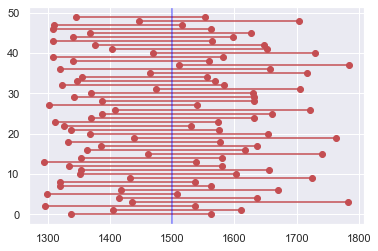

In [40]:
for lower, upper, y in zip(lower_vector, upper_vector, range(samples)):
    plt.plot((lower, upper), (y, y), "ro-")

plt.axvline(population.mean(), color="blue", alpha=0.5)

plt.show()

### 2. Pick a confidence level of your choosing, provided it is not 95%. What is the appropriate critical value?

If we take a 99% confidence interval, the critical value will be 2.58.

### 3. Calculate 50 confidence intervals at the confidence level you chose in the previous question. You do not need to obtain new samples, simply calculate new intervals based on the sample means and standard deviations you have already collected. Plot all intervals and calculate the proportion of intervals that include the true population mean. How does this percentage compare to the confidence level selected for the intervals?

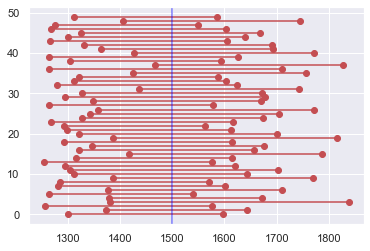

In [42]:
lower_vector = samp_mean - 2.58 * (samp_std / (n ** 0.5))
upper_vector = samp_mean + 2.58 * (samp_std / (n ** 0.5))

for lower, upper, y in zip(lower_vector, upper_vector, range(samples)):
    plt.plot((lower, upper), (y, y), "ro-")

plt.axvline(population.mean(), color="blue", alpha=0.5)

plt.show()


Here we get every confidence interval to include our population mean. Again, no surprise since we are using a small number of samples.